In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp

# set display options
pd.set_option('display.max_columns', None)

In [2]:
#import dataset
X_train = pd.read_pickle('./data/X_train.pkl')
y_train = pd.read_pickle('./data/y_train.pkl')

X_test = pd.read_pickle('./data/X_test.pkl')
y_test = pd.read_pickle('./data/y_test.pkl')


In [3]:
train_set = pd.concat([X_train, y_train], axis=1)

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between ZRI value and asian_pop")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'value ~ asian_pop', data=train_set).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between ZRI value and asian_pop
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                 1.523e+04
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:27:21   Log-Likelihood:            -4.1841e+05
No. Observations:               54620   AIC:                         8.368e+05
Df Residuals:                   54618   BIC:                         8.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 
print ("OLS regression model for the association between ZRI value and income_per_capita")
# reg1 is the model name , followed by equal sign. 
reg1 = smf.ols(formula = 'value ~ income_per_capita', data=train_set).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between ZRI value and income_per_capita
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                 1.891e+04
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        13:27:24   Log-Likelihood:            -4.1701e+05
No. Observations:               54620   AIC:                         8.340e+05
Df Residuals:                   54618   BIC:                         8.340e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

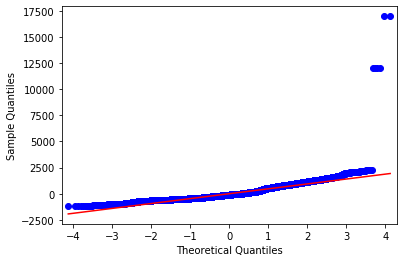

In [6]:
#Q-Q plot for normality
fig4=sm.qqplot(reg1.resid, line='r')

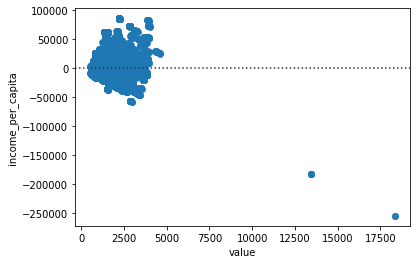

In [7]:
# simple plot of residuals
import seaborn as sns

sns.residplot('value', 'income_per_capita', data=train_set)

In [8]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train_set.shape, "\n")
print ("Column Headers:", list(train_set.columns.values), "\n")
print (train_set.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (54620, 24) 

Column Headers: ['Season', 'AGIncome', 'TotIncome', 'SalariesWages', 'NumUnemply', 'TotTaxes', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89', 'MortDeliq90', 'total_pop', 'median_age', 'white_pop', 'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita', 'vacant_housing_units_for_rent', 'percent_income_spent_on_rent', 'high_school_diploma', 'associates_degree', 'bachelors_degree', 'masters_degree', 'value'] 

Season                             int64
AGIncome                         float64
TotIncome                        float64
SalariesWages                    float64
NumUnemply                       float64
TotTaxes                         float64
Unemploy-\nment Rate\n(%)        float64
MortDeliq30-89                   float64
MortDeliq90                      float64
total_pop                        float64
median_age                       float64
white_pop   

In [9]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train_set:
    # Find all the unique feature values
    uniq = train_set[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train_set[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'Season' has 4 unique values
[2 4 3 1]

-----------------------------------------------------------------------

'AGIncome' has 1640 unique values
~~Listing up to 10 unique values~~
[1222721.33333333  857341.         2270602.83333333 1021157.
 1355903.66666667  414916.5         425994.5         355895.16666667
  427391.          376756.83333333]

-----------------------------------------------------------------------

'TotIncome' has 1640 unique values
~~Listing up to 10 unique values~~
[1247542.5         871096.33333333 2299776.         1032314.5
 1376626.83333333  420569.83333333  430556.33333333  359335.5
  434608.33333333  380968.83333333]

-----------------------------------------------------------------------

'SalariesWages' has 1640 unique values
~~Listing up to 10 unique values~~
[ 763333.33333333  617052.         1031573.5         824423.16666667
  757321.5         321795.66666667  332285.5         285797.16666667
  324350.33333333  326401.5       ]


In [10]:
# Check for duplicate index or rows
idsUnique = len(set(train_set.index))
idsTotal = train_set.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 54620 total entries


In [11]:
#get summary of numerical variables
train_set.describe()

,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,value
count,54620.000000,5.462000e+04,5.462000e+04,5.462000e+04,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000,54620.000000
mean,2.322885,2.322223e+05,2.353933e+05,1.581503e+05,92.790065,13254.929775,4.401668,0.584074,0.378962,37450.551703,0.001272,0.549537,0.149582,0.073754,0.190990,0.459255,35310.429696,0.057006,30.853182,0.129229,0.049854,0.160802,0.075925,1451.298792
std,0.940976,1.948190e+05,1.974085e+05,1.053914e+05,66.520068,19547.377442,1.410166,0.966769,0.655935,18057.873708,0.001101,0.241982,0.184604,0.087030,0.182757,0.052083,16932.269793,0.034711,4.856297,0.053856,0.018496,0.079110,0.048576,580.814489
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,541.000000
25%,2.000000,1.173332e+05,1.188202e+05,8.768350e+04,43.333333,3642.333333,3.600000,0.000000,0.000000,23956.000000,0.000735,0.382418,0.027370,0.020537,0.061989,0.425400,23420.500000,0.033872,27.500000,0.087329,0.036387,0.098236,0.039104,1035.750000
50%,2.000000,1.842665e+05,1.859175e+05,1.355128e+05,76.666667,7285.500000,4.200000,0.000000,0.000000,34715.000000,0.001043,0.589044,0.079101,0.042825,0.128981,0.453200,31472.000000,0.049247,30.300000,0.131911,0.048876,0.154487,0.066141,1335.000000
75%,3.000000,2.921008e+05,2.968803e+05,2.094415e+05,128.333333,16590.166667,5.000000,1.200000,0.700000,48494.000000,0.001505,0.745745,0.189452,0.096552,0.245951,0.489400,43521.500000,0.073360,33.500000,0.169399,0.061854,0.213617,0.107515,1724.000000
max,4.000000,2.383970e+06,2.406416e+06,1.031574e+06,815.000000,321766.000000,14.600000,6.400000,3.600000,114647.000000,0.015890,0.973506,0.982393,0.726602,0.977026,0.685700,154723.000000,0.487710,50.000000,0.279457,0.126473,0.462318,0.344235,18349.000000


In [12]:
# Skewness of the distribution

print(train_set.skew())

# Values close to 0 show less skew


Season                           0.489076
AGIncome                         3.448987
TotIncome                        3.426525
SalariesWages                    2.029492
NumUnemply                       1.857485
TotTaxes                         6.233790
Unemploy-\nment Rate\n(%)        1.013576
MortDeliq30-89                   1.607193
MortDeliq90                      1.717386
total_pop                        0.872985
median_age                       7.017474
white_pop                       -0.499358
black_pop                        2.174977
asian_pop                        2.658967
hispanic_pop                     1.646705
gini_index                       0.049980
income_per_capita                1.612365
vacant_housing_units_for_rent    1.937291
percent_income_spent_on_rent     0.588533
high_school_diploma              0.047329
associates_degree                0.442241
bachelors_degree                 0.520415
masters_degree                   0.875553
value                            2

In [13]:
# Skewness of the distribution

print(train_set.kurt())

Season                           -0.639509
AGIncome                         20.793661
TotIncome                        20.555380
SalariesWages                     7.657151
NumUnemply                        8.623860
TotTaxes                         64.254798
Unemploy-\nment Rate\n(%)         5.123888
MortDeliq30-89                    2.146365
MortDeliq90                       2.085096
total_pop                         0.887690
median_age                       73.662056
white_pop                        -0.711771
black_pop                         5.017894
asian_pop                         8.898027
hispanic_pop                      2.494149
gini_index                        3.843633
income_per_capita                 4.086358
vacant_housing_units_for_rent    10.921563
percent_income_spent_on_rent      2.098374
high_school_diploma              -0.765055
associates_degree                 0.230890
bachelors_degree                 -0.133190
masters_degree                    0.454484
value      

In [14]:
#Check when a value in a cloumn is zero
train_set[(train_set['value'] == 0)].count()

Season                           0
AGIncome                         0
TotIncome                        0
SalariesWages                    0
NumUnemply                       0
TotTaxes                         0
Unemploy-\nment Rate\n(%)        0
MortDeliq30-89                   0
MortDeliq90                      0
total_pop                        0
median_age                       0
white_pop                        0
black_pop                        0
asian_pop                        0
hispanic_pop                     0
gini_index                       0
income_per_capita                0
vacant_housing_units_for_rent    0
percent_income_spent_on_rent     0
high_school_diploma              0
associates_degree                0
bachelors_degree                 0
masters_degree                   0
value                            0
dtype: int64

In [15]:
df = train_set[['income_per_capita','value']]

In [16]:
df.head()


,income_per_capita,value
0,68995.0,3727.0
1,69983.0,1735.0
2,69983.0,1735.0
3,69983.0,1735.0
4,114641.0,3609.0


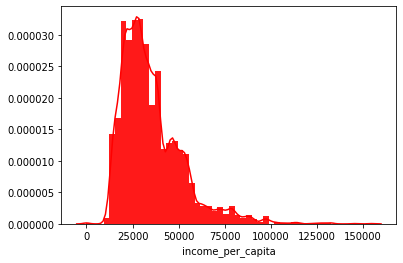

In [17]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(df['income_per_capita'], kde = True, color = 'r', hist_kws={'alpha': 0.9})

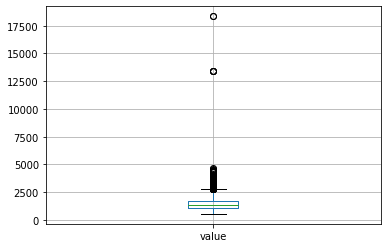

In [18]:
train_set.boxplot(column="value")
#sns.boxplot(x='value', y='Year', data=train_set)

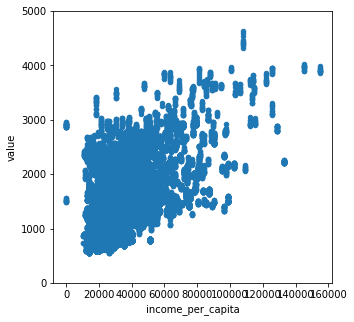

In [20]:
train_set.plot(kind="scatter",     # Create a scatterplot
              x="income_per_capita",          # Put carat on the x axis
              y="value",          # Put price on the y axis
              figsize=(5,5),
              ylim=(0,5000))